# Predictive Maintenance - Classifying whether a machine will fail within the next 7 days

### Author : Kelvin Kipkorir

![Predictive Maintenance Overview](images/overview.jpg)


# Overview
****
Predictive maintenance is a strategy that anticipates failures in industrial machinery before they occur. Unlike traditional maintenance practices, which often involve scheduled servicing or reacting to breakdowns, predictive maintenance enables industries to perform maintenance only when it's truly needed.

Traditional maintenance strategies typically fall into two categories:

1. `Run-to-Failure` – The machine is used until it breaks down, after which it is either repaired or replaced.
2. `Preventive Maintenance` – Maintenance is performed at regular, scheduled intervals, regardless of the machine’s actual condition.

With the development of microprocessors and advancements in machine learning (ML), predictive maintenance has become increasingly practical and effective. Unlike physics-based models, ML models can handle **large-scale, high-dimensional datasets**, making them well-suited for analyzing sensor readings and operational metrics. These models have revolutionized the estimation of **Remaining Useful Life (RUL)** for industrial systems and play a critical role in minimizing costly downtime caused by unexpected failures.

This project aims to support **TechLine Industries** in adopting predictive maintenance across their smart factory operations. By leveraging machine learning — specifically **logistic regression** and **decision trees** — the project classifies whether a machine is likely to fail within the next 7 days. 

# Business Problem
****
Techline Industries is a growing manufacturing company that has numerous machines in its manufacturing plants. As part of its digital transformation strategy, the company is investing in predictive maintenance to reduce operational costs, minimize unplanned downtime, and improve equipment reliability. However, with complex sensor data being generated across various machine types, the company lacks a robust system to anticipate failures before they occur.

To address this challenge, historical sensor data will be used to develop a machine learning model that can predict equipment failures up to one week in advance. This will empower maintenance teams to take timely, corrective actions — helping the company avoid costly downtimes typically associated with traditional maintenance strategies.

# Objectives
****
The main objective of this project is to develop a machine learning model that predicts whether a machine is likely to fail within the next 7 days, using sensor and operational data. To achieve this, the following specific objectives will be pursued:

1. **Explore and Understand the Dataset**  
   Analyze the structure, content, and distribution of the dataset to gain insights into the key variables and relationships that may affect machine failures.

2. **Preprocess the Data for Modeling**  
   Clean and transform the data to ensure it is suitable for machine learning, including handling missing values, encoding categorical features, and balancing the classes.

3. **Build and Evaluate Baseline Classification Models**  
   Implement basic models such as logistic regression and decision trees to establish performance benchmarks.

4. **Perform Hyperparameter Tuning**  
   Optimize model performance through parameter tuning using techniques like grid search or cross-validation.

5. **Compare Model Performances**  
   Evaluate and compare models using metrics such as accuracy, precision, recall, F1-score, and AUC-ROC to determine the best approach.

6. **Draw Business Insights and Recommendations**  
   Interpret the results to provide actionable insights for TechLine Industries, enabling them to reduce downtime and improve equipment reliability through predictive maintenance.


# Data Understanding

The dataset used in this project, sourced from Kaggle and titled **"Industrial IoT"**, contains **500,000 entries** representing various operational conditions of industrial machines. It includes **22 columns** capturing both sensor readings and metadata, such as temperature, vibration, pressure, coolant flow, and installation year. These features simulate real-world telemetry data from Industrial IoT systems, providing a good foundation for developing predictive maintenance models.


## 1. Exploratory Data Analysis 

In [1]:
#importing standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:

#extract data from the zip file 
df = pd.read_csv('industrial_iot_data.zip', compression='zip')
df

,Machine_ID,Machine_Type,Installation_Year,Operational_Hours,Temperature_C,Vibration_mms,Sound_dB,Oil_Level_pct,Coolant_Level_pct,Power_Consumption_kW,...,Failure_History_Count,AI_Supervision,Error_Codes_Last_30_Days,Remaining_Useful_Life_days,Failure_Within_7_Days,Laser_Intensity,Hydraulic_Pressure_bar,Coolant_Flow_L_min,Heat_Index,AI_Override_Events
0,MC_000000,Mixer,2027,81769,73.43,12.78,83.72,36.76,68.74,84.95,...,5,True,3,162.0,False,NaN,NaN,NaN,NaN,2
1,MC_000001,Industrial_Chiller,2032,74966,58.32,14.99,77.04,100.00,62.13,154.61,...,2,True,4,147.0,False,NaN,NaN,40.92,NaN,2
2,MC_000002,Pick_and_Place,2003,94006,49.63,23.78,69.08,42.96,35.96,51.90,...,1,True,6,0.0,True,NaN,NaN,NaN,NaN,2
3,MC_000003,Vision_System,2007,76637,63.73,12.38,85.58,94.90,48.94,75.61,...,1,False,4,161.0,False,NaN,NaN,NaN,NaN,0
4,MC_000004,Shuttle_System,2016,20870,42.77,4.42,96.72,47.56,53.78,224.93,...,2,False,1,765.0,False,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,MC_499995,Vacuum_Packer,2011,14425,65.42,16.50,81.95,59.21,73.67,255.87,...,3,False,0,820.0,False,NaN,NaN,NaN,NaN,0
499996,MC_499996,Conveyor_Belt,2003,75501,44.83,12.88,64.94,73.69,29.25,198.37,...,1,False,4,34.0,False,NaN,NaN,NaN,NaN,0
499997,MC_499997,CMM,2039,19855,37.26,11.46,70.70,70.70,49.04,156.59,...,2,False,4,815.0,False,NaN,NaN,NaN,NaN,0
499998,MC_499998,Dryer,2035,86823,67.72,16.76,77.45,97.00,15.40,132.33,...,2,True,0,99.0,False,NaN,NaN,NaN,NaN,2


In [3]:
#look at the columns and if there any missing values
df.info()
print("The dataset shape : {}".format(df.shape))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Machine_ID                  500000 non-null  object 
 1   Machine_Type                500000 non-null  object 
 2   Installation_Year           500000 non-null  int64  
 3   Operational_Hours           500000 non-null  int64  
 4   Temperature_C               500000 non-null  float64
 5   Vibration_mms               500000 non-null  float64
 6   Sound_dB                    500000 non-null  float64
 7   Oil_Level_pct               500000 non-null  float64
 8   Coolant_Level_pct           500000 non-null  float64
 9   Power_Consumption_kW        500000 non-null  float64
 10  Last_Maintenance_Days_Ago   500000 non-null  int64  
 11  Maintenance_History_Count   500000 non-null  int64  
 12  Failure_History_Count       500000 non-null  int64  
 13  AI_Supervision

In [4]:
# looking at the amount of missing values
df.isna().sum()

Machine_ID                         0
Machine_Type                       0
Installation_Year                  0
Operational_Hours                  0
Temperature_C                      0
Vibration_mms                      0
Sound_dB                           0
Oil_Level_pct                      0
Coolant_Level_pct                  0
Power_Consumption_kW               0
Last_Maintenance_Days_Ago          0
Maintenance_History_Count          0
Failure_History_Count              0
AI_Supervision                     0
Error_Codes_Last_30_Days           0
Remaining_Useful_Life_days         0
Failure_Within_7_Days              0
Laser_Intensity               484844
Hydraulic_Pressure_bar        469660
Coolant_Flow_L_min            454376
Heat_Index                    454786
AI_Override_Events                 0
dtype: int64

The `Laser_Intesity`,`Hydraulic_Pressure_bar`,`Coolant_Flow_L_min`,`Heat_Index` have a lot of missing values 

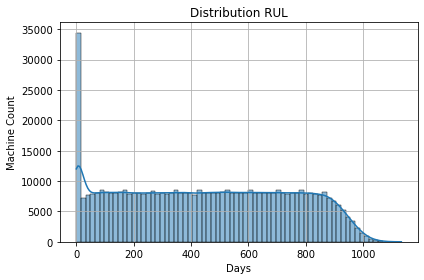

In [5]:
# Visulize the distribution of the remaining useful days(RUL)
sns.histplot(df["Remaining_Useful_Life_days"], bins=70, kde=True)
plt.title('Distribution RUL')
plt.xlabel("Days")
plt.ylabel("Machine Count")
plt.grid(True)
plt.tight_layout()
plt.show()


False    469968
True      30032
Name: Failure_Within_7_Days, dtype: int64


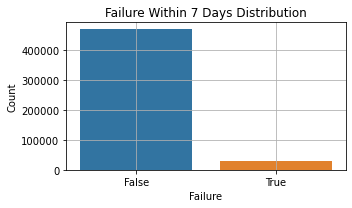

In [6]:
#the distribution of the target feature
print(df['Failure_Within_7_Days'].value_counts())

plt.figure(figsize=(5, 3))
sns.countplot(x="Failure_Within_7_Days", data=df)
plt.title("Failure Within 7 Days Distribution")
plt.xlabel("Failure")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()

##### There are 469968 machines that will not fail in the next 7 days and 30032 that will likely fail in next seven days.
The data displays class **imbalance** problems

*****

#### Visualizing correlations in numeric variables

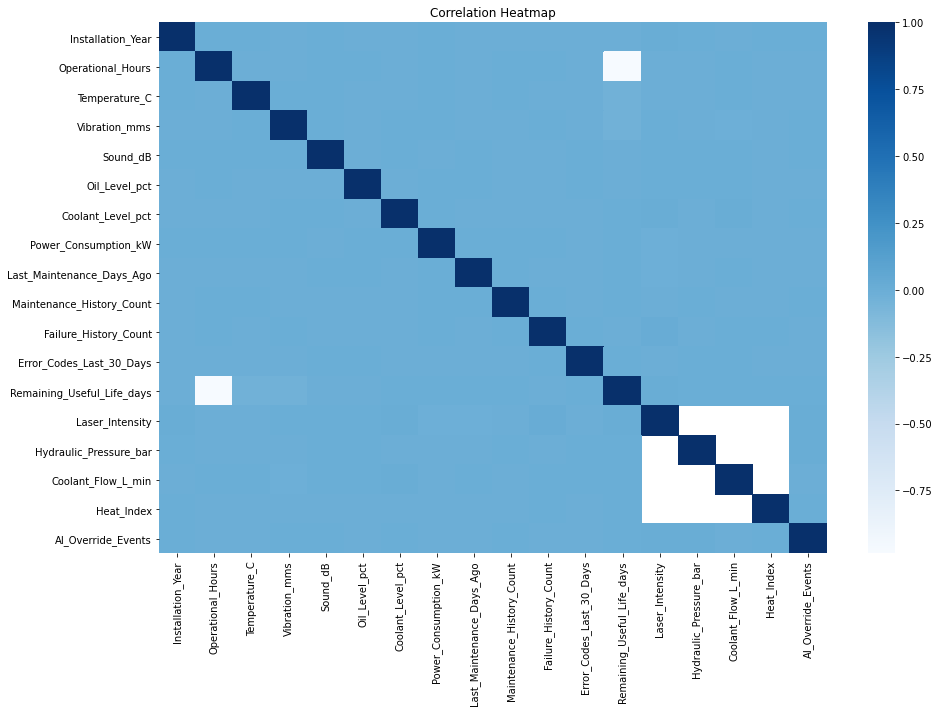

In [7]:
# Correlation heatmap for numeric features
num_features = df.select_dtypes(include=[np.number])
if "Failure_Within_7_Days" in num_features.columns:
    num_features = num_features.drop(columns=["Failure_Within_7_Days"])
plt.figure(figsize=(14, 10))
sns.heatmap(num_features.corr(), cmap="Blues", center=0, annot=False)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

----
There is a negative correlation between remaining useful life and operational hours

#### Since there different types of machines it is also helpful to visualize failure by machine type

There are 33 machine types


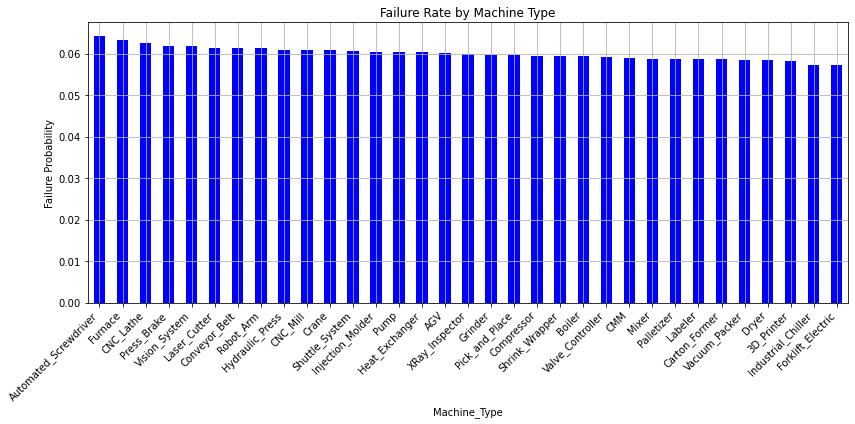

In [8]:
#see the type of machines in the industry
print(f"There are {len(df['Machine_Type'].value_counts())} machine types")

# Failure rate by machine type
failure_by_type = df.groupby("Machine_Type")["Failure_Within_7_Days"].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
failure_by_type.plot(kind="bar", color="blue")
plt.title("Failure Rate by Machine Type")
plt.ylabel("Failure Probability")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

## 2. Data Preprocessing

To ensure the dataset was suitable for machine learning models, several preprocessing steps were carried out:

- **Handling Missing Values**: Numerical columns with missing values were imputed using `SimpleImputer`. Additionally, `MissingIndicator` was used to flag the presence of missing values as separate features, preserving any potential signal from missingness patterns.

- **Categorical Encoding**: The `machine_type` feature, which contains 33 unique categories, was transformed using `OneHotEncoder` to allow models to interpret the categorical data numerically.

- **Feature Scaling**: Numerical features were standardized to have zero mean and unit variance using `StandardScaler`, which is especially beneficial for models like Logistic Regression.

- **Class Imbalance Handling**: The target variable was highly imbalanced, with far fewer failure instances. To address this, **SMOTE (Synthetic Minority Over-sampling Technique)** was applied to the training data to generate synthetic samples for the minority class, helping models learn more balanced decision boundaries.




#### Lets look at the columns and see if there are any we can drop because of alot of missing values

In [9]:
# Drop columns with more than 90% missing
threshold = 0.9
missing_fraction = df.isnull().mean()
columns_to_consider_droping = missing_fraction[missing_fraction > threshold].index
print(columns_to_consider_droping)

Index(['Laser_Intensity', 'Hydraulic_Pressure_bar', 'Coolant_Flow_L_min',
       'Heat_Index'],
      dtype='object')


Now that we see that these 4 columns have lots of missing values we can try and see what they contain by grouping data using them. Sometimes certain Features can be specific to machines and don't apply to other machines

In [10]:
df.groupby('Machine_Type')[['Laser_Intensity', 'Hydraulic_Pressure_bar', 'Coolant_Flow_L_min', 'Heat_Index']].count()

,Laser_Intensity,Hydraulic_Pressure_bar,Coolant_Flow_L_min,Heat_Index
Machine_Type,,,,
3D_Printer,0,0,0,0
AGV,0,0,0,0
Automated_Screwdriver,0,0,0,0
Boiler,0,0,0,15050
CMM,0,0,0,0
CNC_Lathe,0,0,15290,0
CNC_Mill,0,0,15064,0
Carton_Former,0,0,0,0
Compressor,0,0,0,0


As we can see the features are specific to some machines So for all other machines we will impute values of 0 in each of the features

Looking at the dataset we have the installation year. A better feature to use will be the machine age. The dataset has years upto `2040`. We will use the `2040` as the current year so that we are able to calculate `machine age` withouth gettig negative ages

In [11]:
#Feature engineering the age column
current_year = df["Installation_Year"].max()
df["Machine_Age"] = current_year - df["Installation_Year"]
df.drop('Installation_Year',axis=1,inplace=True)
df

,Machine_ID,Machine_Type,Operational_Hours,Temperature_C,Vibration_mms,Sound_dB,Oil_Level_pct,Coolant_Level_pct,Power_Consumption_kW,Last_Maintenance_Days_Ago,...,AI_Supervision,Error_Codes_Last_30_Days,Remaining_Useful_Life_days,Failure_Within_7_Days,Laser_Intensity,Hydraulic_Pressure_bar,Coolant_Flow_L_min,Heat_Index,AI_Override_Events,Machine_Age
0,MC_000000,Mixer,81769,73.43,12.78,83.72,36.76,68.74,84.95,153,...,True,3,162.0,False,NaN,NaN,NaN,NaN,2,13
1,MC_000001,Industrial_Chiller,74966,58.32,14.99,77.04,100.00,62.13,154.61,136,...,True,4,147.0,False,NaN,NaN,40.92,NaN,2,8
2,MC_000002,Pick_and_Place,94006,49.63,23.78,69.08,42.96,35.96,51.90,258,...,True,6,0.0,True,NaN,NaN,NaN,NaN,2,37
3,MC_000003,Vision_System,76637,63.73,12.38,85.58,94.90,48.94,75.61,43,...,False,4,161.0,False,NaN,NaN,NaN,NaN,0,33
4,MC_000004,Shuttle_System,20870,42.77,4.42,96.72,47.56,53.78,224.93,346,...,False,1,765.0,False,NaN,NaN,NaN,NaN,0,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,MC_499995,Vacuum_Packer,14425,65.42,16.50,81.95,59.21,73.67,255.87,282,...,False,0,820.0,False,NaN,NaN,NaN,NaN,0,29
499996,MC_499996,Conveyor_Belt,75501,44.83,12.88,64.94,73.69,29.25,198.37,208,...,False,4,34.0,False,NaN,NaN,NaN,NaN,0,37
499997,MC_499997,CMM,19855,37.26,11.46,70.70,70.70,49.04,156.59,185,...,False,4,815.0,False,NaN,NaN,NaN,NaN,0,1
499998,MC_499998,Dryer,86823,67.72,16.76,77.45,97.00,15.40,132.33,274,...,True,0,99.0,False,NaN,NaN,NaN,NaN,2,5


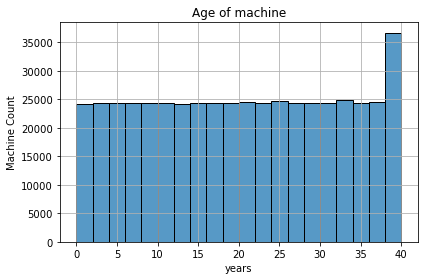

In [12]:
#visualize the machine type using a histogram
sns.histplot(df["Machine_Age"], bins=20)
plt.title('Age of machine')
plt.xlabel("years")
plt.ylabel("Machine Count")
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
# change the AI supervision column to be int type
df['AI_Supervision'] = df['AI_Supervision'].astype(int)

#### Split your dataset into X and y
Our target feature is `Failure_Within_7_days`
For X we  drop the the target feature and also the machine ID as it is just an identification data 

In [14]:
# split the dataframe to x and y
X = df.drop(['Failure_Within_7_Days','Machine_ID'],axis = 1)
y = df['Failure_Within_7_Days'].astype(int)


To avoid data leakage we first split our data into the train and test categories. `stratify = y` helps to make sure that the class weights in the split datasets are propotional to those in the original.

The split ratio used in this case is 75/25 for the train/test sets

In [15]:
from sklearn.model_selection import train_test_split

#split you data into  train and test samples
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 42,stratify=y)

There are 33 machine types in this dataset. We will be using **OneHotEncoder** to convert this categorical column into a numerical.


In [16]:
from sklearn.preprocessing import OneHotEncoder

categorical_features = ['Machine_Type']

encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

# fit_transform training data
X_train_encoded = encoder.fit_transform(X_train[categorical_features])

# transform test data 
X_test_encoded = encoder.transform(X_test[categorical_features])

encoded_feature_names = encoder.get_feature_names(categorical_features)

X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoded_feature_names, index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoded_feature_names, index=X_test.index)

# preview
X_train_encoded_df

,Machine_Type_3D_Printer,Machine_Type_AGV,Machine_Type_Automated_Screwdriver,Machine_Type_Boiler,Machine_Type_CMM,Machine_Type_CNC_Lathe,Machine_Type_CNC_Mill,Machine_Type_Carton_Former,Machine_Type_Compressor,Machine_Type_Conveyor_Belt,...,Machine_Type_Pick_and_Place,Machine_Type_Press_Brake,Machine_Type_Pump,Machine_Type_Robot_Arm,Machine_Type_Shrink_Wrapper,Machine_Type_Shuttle_System,Machine_Type_Vacuum_Packer,Machine_Type_Valve_Controller,Machine_Type_Vision_System,Machine_Type_XRay_Inspector
11509,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
238921,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
272103,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60521,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
409670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
400693,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
311254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


We drop the hot encoded column and concatenate the encoded columns

In [17]:
# Drop original
X_train = X_train.drop(columns=categorical_features,axis=1)
X_test = X_test.drop(columns=categorical_features,axis=1)

# Concatenate encoded columns
X_train = pd.concat([X_train, X_train_encoded_df], axis=1)
X_test = pd.concat([X_test, X_test_encoded_df], axis=1)



In [18]:
X_train.head(4)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375000 entries, 11509 to 264173
Data columns (total 52 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Operational_Hours                   375000 non-null  int64  
 1   Temperature_C                       375000 non-null  float64
 2   Vibration_mms                       375000 non-null  float64
 3   Sound_dB                            375000 non-null  float64
 4   Oil_Level_pct                       375000 non-null  float64
 5   Coolant_Level_pct                   375000 non-null  float64
 6   Power_Consumption_kW                375000 non-null  float64
 7   Last_Maintenance_Days_Ago           375000 non-null  int64  
 8   Maintenance_History_Count           375000 non-null  int64  
 9   Failure_History_Count               375000 non-null  int64  
 10  AI_Supervision                      375000 non-null  int32  
 11  Error_Codes_Last_30_Da

The **MissingIndicator** is used to show whether a value contained a null value in the original dataset.

In [19]:
#adding missing indicators
from sklearn.impute import MissingIndicator

columns_to_be_imputed_train = X_train[['Laser_Intensity', 'Hydraulic_Pressure_bar', 'Coolant_Flow_L_min', 'Heat_Index']]
columns_to_be_imputed_test = X_test[['Laser_Intensity', 'Hydraulic_Pressure_bar', 'Coolant_Flow_L_min', 'Heat_Index']]

indicator = MissingIndicator()
X_train_indicators = indicator.fit_transform(columns_to_be_imputed_train)
X_test_indicators = indicator.transform(columns_to_be_imputed_test)

#create column names for indicators
indicator_columns = [col + "_Missing" for col in columns_to_be_imputed_train.columns]

#numpy arrays to a DataFrame
X_train_indicators_df = pd.DataFrame(X_train_indicators.astype(int), columns=indicator_columns, index=X_train.index)
X_test_indicators_df = pd.DataFrame(X_test_indicators.astype(int),columns=indicator_columns,index=X_test.index)

# concatenate with the original DtaFrame
X_train = pd.concat([X_train, X_train_indicators_df], axis=1)
X_test = pd.concat([X_test, X_test_indicators_df], axis=1)

The **SimpleImputer** from sklearn helps to fill null values in the dataset. Since these machines are different an assumption is that the conditions represented by different features in the dataset do not apply to them hence the `fill_value` of 0

In [20]:
from sklearn.impute import SimpleImputer

#Impute missing values using simple imputer
imputer = SimpleImputer(strategy='constant', fill_value=0)
X_train_imputed = imputer.fit_transform(columns_to_be_imputed_train)
X_test_imputed = imputer.transform(columns_to_be_imputed_test)

X_train_imputed_df = pd.DataFrame(X_train_imputed,columns=columns_to_be_imputed_train.columns,index=X_train.index)
X_test_imputed_df = pd.DataFrame(X_test_imputed,columns=columns_to_be_imputed_test.columns,index=X_test.index)

X_train[columns_to_be_imputed_train.columns] = X_train_imputed_df
X_test[columns_to_be_imputed_test.columns] = X_test_imputed_df

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125000 entries, 10471 to 368276
Data columns (total 56 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Operational_Hours                   125000 non-null  int64  
 1   Temperature_C                       125000 non-null  float64
 2   Vibration_mms                       125000 non-null  float64
 3   Sound_dB                            125000 non-null  float64
 4   Oil_Level_pct                       125000 non-null  float64
 5   Coolant_Level_pct                   125000 non-null  float64
 6   Power_Consumption_kW                125000 non-null  float64
 7   Last_Maintenance_Days_Ago           125000 non-null  int64  
 8   Maintenance_History_Count           125000 non-null  int64  
 9   Failure_History_Count               125000 non-null  int64  
 10  AI_Supervision                      125000 non-null  int32  
 11  Error_Codes_Last_30_Da

The test sample shows that all datatypes are now numbers so we can scale now

Scaling of the data using the **StandardScaler** .Put all data values between 0 and 1.This preprocessing method will only be for logistic regression classification

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_logistic = pd.DataFrame(X_train_scaled,columns=X_train.columns,index=X_train.index)
X_test_logistic = pd.DataFrame(X_test_scaled,columns=X_test.columns,index=X_test.index)
#preview
X_train_logistic.head(5)

,Operational_Hours,Temperature_C,Vibration_mms,Sound_dB,Oil_Level_pct,Coolant_Level_pct,Power_Consumption_kW,Last_Maintenance_Days_Ago,Maintenance_History_Count,Failure_History_Count,...,Machine_Type_Shrink_Wrapper,Machine_Type_Shuttle_System,Machine_Type_Vacuum_Packer,Machine_Type_Valve_Controller,Machine_Type_Vision_System,Machine_Type_XRay_Inspector,Laser_Intensity_Missing,Hydraulic_Pressure_bar_Missing,Coolant_Flow_L_min_Missing,Heat_Index_Missing
11509,-1.617163,-1.198423,0.649333,1.670995,-1.559706,-0.417893,-0.473389,-1.385668,0.446532,-0.000278,...,-0.175331,-0.178592,-0.176563,-0.177012,-0.17674,-0.175976,0.177132,0.254135,-3.157233,0.315723
238921,-0.608756,1.681227,0.452971,-1.565244,-0.233416,0.203156,1.060638,1.609150,0.893341,-0.708208,...,-0.175331,-0.178592,-0.176563,-0.177012,-0.17674,-0.175976,0.177132,-3.934910,0.316733,0.315723
272103,-1.523566,-0.445356,0.068260,-0.008648,1.622010,0.583047,0.799966,0.708809,-0.893897,-0.000278,...,-0.175331,-0.178592,-0.176563,-0.177012,-0.17674,-0.175976,0.177132,0.254135,-3.157233,0.315723
60521,0.535354,-1.376360,-0.202239,0.194430,-0.562468,1.326837,0.565299,1.694445,-1.340706,-0.000278,...,-0.175331,-0.178592,-0.176563,-0.177012,-0.17674,-0.175976,0.177132,-3.934910,0.316733,0.315723
71915,1.460309,0.393681,-0.210254,1.091773,1.562038,0.347074,0.315504,1.703922,-0.447087,0.707653,...,-0.175331,-0.178592,-0.176563,-0.177012,-0.17674,-0.175976,0.177132,0.254135,0.316733,0.315723


**SMOTE** library helps deal with class imbalances.For our case the minority is that the few machines will fail in the next 7 days.
This is only done for the training subset

In [22]:
#First install the imblearn library
!pip install imblearn

In [23]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_logistic, y_train_logistic = smote.fit_resample(X_train_logistic, y_train)
X_train_logistic.shape

(704952, 56)

## 3. Modeling


Two supervised machine learning algorithms were employed to classify whether a machine is likely to fail within the next 7 days:

- **Logistic Regression**  
   The model was trained on the SMOTE-balanced dataset, and hyperparameters such as regularization strength (`C`) and class weights were tuned to see effect on perfomance.

- **Decision Tree Classifier**  
  Different hyperparameters were played with to check perfomance

Both models were trained using the same preprocessed dataset to ensure fair comparison. Evaluation was done using metrics such as Accuracy, F1-Score for the minority class, and AUC (Area Under the ROC Curve), providing a comprehensive understanding of model performance.

###  a) Logistic Regression model

For our first model we will use the vanilla version of Logistic Regression

In [24]:
#baseline model
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42)
lr.fit(X_train_logistic, y_train_logistic)


LogisticRegression(random_state=42)

Lets look at the other metrics such as the F1 ,precision ,accuracy and recall

In [25]:
from sklearn.metrics import classification_report, auc,roc_curve, RocCurveDisplay

y_pred_log = lr.predict(X_test_logistic)
y_scores = lr.predict_proba(X_test_logistic)[:, 1]
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    117492
           1       0.90      1.00      0.95      7508

    accuracy                           0.99    125000
   macro avg       0.95      1.00      0.97    125000
weighted avg       0.99      0.99      0.99    125000



In [26]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score


# Compute individual metrics
accuracy = accuracy_score(y_test, y_pred_log)
precision = precision_score(y_test, y_pred_log)
recall = recall_score(y_test, y_pred_log)
f1 = f1_score(y_test, y_pred_log)


print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")


Accuracy : 0.9935
Precision: 0.9028
Recall   : 1.0000
F1 Score : 0.9489


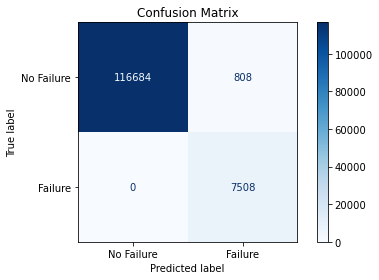

In [28]:
#visualizing the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_log)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Failure", "Failure"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

#### Our model predicts that `116684` machines will not fail in the next 7 days and indeed they are not going to fail (TN), `7508` machines are going to fail which is actually true (TP).The model also predict falsely that `808` machines will  fail in in the next seven days (FP)

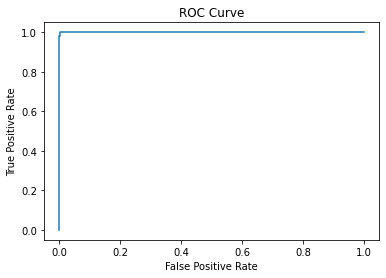

AUC: 0.9999822203063744


In [29]:
#visualization of the ROC curve
#probabilities for the positive class (label 1)

fpr, tpr, thresholds = roc_curve(y_test, y_scores)
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.title('ROC Curve')
plt.show()

print("AUC:", auc(fpr, tpr))

In [30]:
#Look at the parameters for the dafault model
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

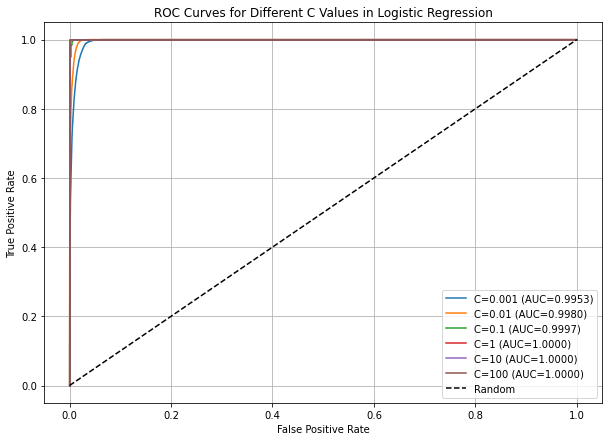

In [31]:
#We are going to play with a few of this hyper parameters to see their effect on model

C_values = [0.001, 0.01, 0.1, 1, 10, 100]

plt.figure(figsize=(10, 7))


for c in C_values:
    model = LogisticRegression(C=c, class_weight='balanced', random_state=42)
    model.fit(X_train_logistic, y_train_logistic)

    
    y_scores = model.predict_proba(X_test_scaled)[:, 1]

    #ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    auc_score = auc(fpr, tpr)

    #pot ROC curve
    plt.plot(fpr, tpr, label=f'C={c} (AUC={auc_score:.4f})')


plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.title('ROC Curves for Different C Values in Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

There is no much change in the modelling result when we play with the regularization parameter C.An increase shows an improvement of model prediction until the we get an AUC of 1. This is the ideal value of AUC. It should actually be lower but because of the nature of our dataset it is actually okay. We have also done our best to reduce `overfitting` but using SMOTE technique 

Lets try building a decision tree of the same

### b) Decision Trees 
lets use the Vanilla version of this model - just with defaults arguments

The scaling and SMOTE transformations were important for the logistic regression because it is a linear model however for decison trees we will use versions of data without this transformations - `X_train` `y_train`,`X_test` and `y_test`

In [32]:
#preview X _train
X_train.head()

,Operational_Hours,Temperature_C,Vibration_mms,Sound_dB,Oil_Level_pct,Coolant_Level_pct,Power_Consumption_kW,Last_Maintenance_Days_Ago,Maintenance_History_Count,Failure_History_Count,...,Machine_Type_Shrink_Wrapper,Machine_Type_Shuttle_System,Machine_Type_Vacuum_Packer,Machine_Type_Valve_Controller,Machine_Type_Vision_System,Machine_Type_XRay_Inspector,Laser_Intensity_Missing,Hydraulic_Pressure_bar_Missing,Coolant_Flow_L_min_Missing,Heat_Index_Missing
11509,3325,41.99,13.23,91.70,40.05,54.46,112.08,36,6,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,1
238921,32447,85.20,12.25,59.35,65.04,68.83,234.78,352,7,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,1
272103,6028,53.29,10.33,74.91,100.00,77.62,213.93,257,3,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,1
60521,65488,39.32,8.98,76.94,58.84,94.83,195.16,361,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,1
71915,92200,65.88,8.94,85.91,98.87,72.16,175.18,362,4,3,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1


The default criterion for the decision tree is the  `gini`.

In [33]:
from sklearn.tree import DecisionTreeClassifier


dt = DecisionTreeClassifier(random_state = 42)
dt.fit(X_train,y_train)


DecisionTreeClassifier(random_state=42)

In [34]:
#The perfomance of the vanilla model

# Make predictions using test set 
y_pred_tree1 = dt.predict(X_test)

# Check the AUC of predictions
fpr_gini, tpr_gini, thresholds = roc_curve(y_test,y_pred_tree1)
roc_auc = auc(fpr_gini,tpr_gini)
roc_auc

1.0

The value of AUC seen from the from the first tree is 1 almost similar to what we got using logistic regression.A better metric to visualize our model is to use the confusion matrix

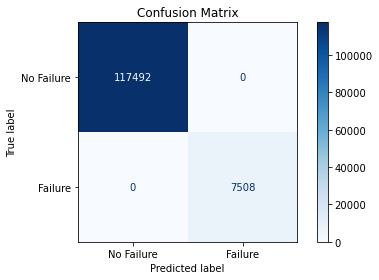

In [35]:

cm_tree1 = confusion_matrix(y_test, y_pred_tree1)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_tree1, display_labels=["No Failure", "Failure"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

We can look at other metrics - f1,recall precision and accuracy

In [36]:

# Compute individual metrics
accuracy = accuracy_score(y_test, y_pred_tree1)
precision = precision_score(y_test, y_pred_tree1)
recall = recall_score(y_test, y_pred_tree1)
f1 = f1_score(y_test, y_pred_tree1)


print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")


Accuracy : 1.0000
Precision: 1.0000
Recall   : 1.0000
F1 Score : 1.0000


Our model seems to be a perfect model! We have 117492 true true negatives and 7508 true positives 

Lets investigate further using the `entropy` criterion

In [37]:
#lets use our criterion to be entropy
dt_entropy = DecisionTreeClassifier(criterion='entropy',random_state = 42)
dt_entropy.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy', random_state=42)

In [38]:
# Check the AUC of predictions
y_pred_tree2 = dt.predict(X_test)

fpr_entropy, tpr_entropy, thresholds = roc_curve(y_test,y_pred_tree2)
roc_auc = auc(fpr_entropy,tpr_entropy)
roc_auc

1.0

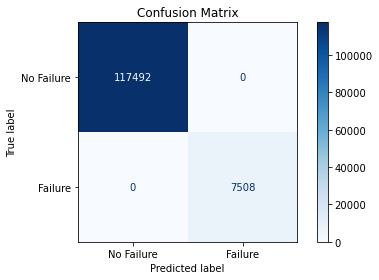

In [39]:
cm_tree1 = confusion_matrix(y_test, y_pred_tree2)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_tree1, display_labels=["No Failure", "Failure"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

#### Again our model seems to be a perfect model! With `117492 ` truely predicted as not going to fail in the next 7 days while  `7508` machines are going to fail in the next 7 days  

We can look at other hyperparameters to see if our result with vary

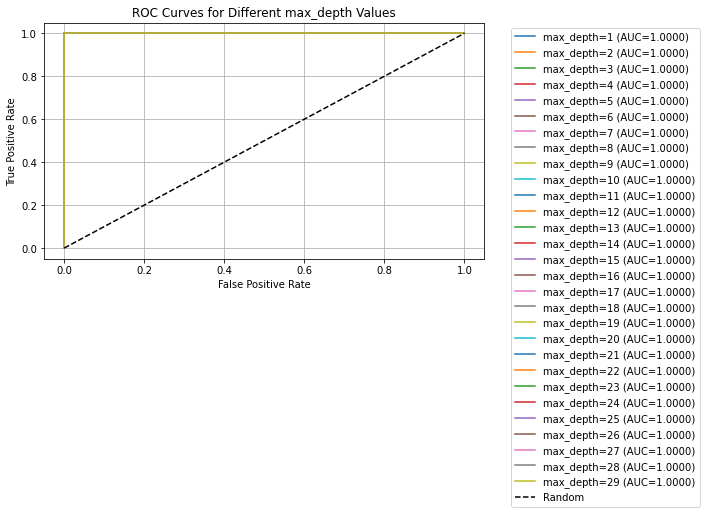

In [40]:
# lets look at max depths

# List of max depths to try
max_depths = list(range(1, 30))


plt.figure(figsize=(10, 6))

# Loop through each max_depth
for depth in max_depths:
    dt_c = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_c.fit(X_train, y_train)

   
    y_scores = dt_c.predict_proba(X_test)[:, 1]

    # Compute ROC and AUC
    fpr, tpr, threshold = roc_curve(y_test, y_scores)
    auc_score = auc(fpr, tpr)

    #Plot
    plt.plot(fpr, tpr, label=f'max_depth={depth} (AUC={auc_score:.4f})')


plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.title('ROC Curves for Different max_depth Values')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

As we can see all have the same AUC score of 1 meaning despite varying the max septh our decision tree remains good
We can look at the playing with max splits

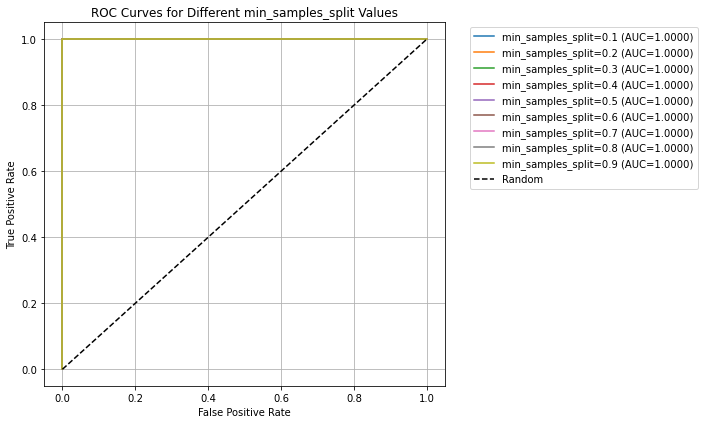

In [41]:
#Lets see the effect of min_samples_split
min_sample_splits = np.arange(0.1, 1.0, 0.1)


plt.figure(figsize=(10, 6))

# Loop through each value
for val in min_sample_splits:
    clf = DecisionTreeClassifier(min_samples_split=val, random_state=42)
    clf.fit(X_train, y_train)
    
    
    y_scores = clf.predict_proba(X_test)[:, 1]
    
    # Compute ROC and AUC
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    auc_score = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'min_samples_split={val:.1f} (AUC={auc_score:.4f})')


plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.title('ROC Curves for Different min_samples_split Values')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


Again we get the same result of having the same AUC of one.Meaning our model is good. So we can conclude using our first model result

# Conclusion

This project focuses on building a classification model to predict machine failures within the next 7 days using a synthetic Industrial IoT dataset. The goal is to support **predictive maintenance**, allowing industries to anticipate failures and carry out proactive interventions—ultimately reducing unplanned downtime and maintenance costs.

###  Data Preprocessing

The data was thoroughly preprocessed through the following steps:

- Handling missing values using `SimpleImputer` and `MissingIndicator`
- Encoding categorical variables with `OneHotEncoder`
- Scaling numerical features where applicable
- Addressing class imbalance using the `SMOTE` algorithm

Two machine learning models were trained and evaluated: **Logistic Regression** and **Decision Tree Classifier**.

---

###  Model Evaluation

#### Logistic Regression:

    Accuracy : 0.9935
    Precision: 0.9028
    Recall   : 1.0000
    F1 Score : 0.9489

#### Decision Tree:
    Accuracy : 1.0000
    Precision: 1.0000
    Recall   : 1.0000
    F1 Score : 1.0000

---

###  Observations

Both models demonstrated strong performance but he decion tree gave a model with higher perfomance achieving an AUC of **~1.0** and near-perfect accuracy and recall, especially for the failure class.

>  **Business Implication**: A high-performing Decision Tree model like this can significantly improve failure detection, especially for rare but critical failure events.

>  **Caveat**: The perfect score may indicate **overfitting** on synthetic or oversampled data. Careful real-world testing and monitoring will be essential post-deployment.

####  Model Interpretability
An added advantage of Decision Trees is their **transparency**. Maintenance teams can visualize decision paths, helping understand which sensor readings most influence failure predictions—valuable for diagnostics and gaining operator trust.



Furthermore, some features (e.g., `Laser_Intensity`, `Hydraulic_Pressure_bar`) are **machine-specific** and contain a high proportion of missing values. Building **machine-type-specific models** in future iterations may improve predictive accuracy and interpretability.

#### Recommendations for Deployment

To transition from experimentation to value:

 **Pilot Deployment**  
   - Select a controlled group of machines with frequent failures.  
   - Integrate the model into existing monitoring systems.  
   - Use real-time sensor feeds to trigger alerts.
---

###  Recommendations for Future Work

- Develop separate models tailored to specific machine types  
- Explore advanced algorithms such as Random Forest or XGBoost for better generalization  
- Consider implementing time-aware cross-validation if temporal features (e.g., timestamps or installation year) are available